# Predictive Analytics : Prediksi Harga Rumah di Kota Bandung

# Data Loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
%matplotlib inline

In [2]:
!gdown 1LFVmlsGF-nmAD0KDXA72xspYoUu9_-Ae

Downloading...
From: https://drive.google.com/uc?id=1LFVmlsGF-nmAD0KDXA72xspYoUu9_-Ae
To: /content/data_rumah.xlsx
100% 371k/371k [00:00<00:00, 154MB/s]


In [3]:
data_rumah = pd.read_excel('/content/data_rumah.xlsx')
data_rumah

,Unnamed: 0,judul,alamat,deskripsi,kamar,bangunan,lahan,harga
0,0,Promo Rumah Mewah Akhir Tahun,"Antapani, Bandung",Promo akhir tahun !! Hanya 500 jt-an + FREE SH...,3,75,84,590000000
1,1,Rumah modern Readystock di bandung raya cimahi...,"Bandung Wetan, Bandung",Rumah Baru modern 2 LT di Sayap Kota Cimahi de...,3,70,71,700000000
2,2,Dijual rumah 300 jutaan jalan lebar dekat Ikea...,"Padalarang, Bandung",*Jadilah konsumen CERDAS !* *Tips singkat sebe...,2,36,72,386000000
3,3,Dijual PROMO rumah 2 lantai di sayap Setiabudi...,Bandung,Copy writing nasc NUANSA ALAM SETIABUDHI CLOV...,2,60,60,499000000
4,4,Rumah Strategis Siap Huni di dekat Tol Cileuny...,"Cibiru Hilir, Bandung","Hunian Nyaman di Cibiru, Cileunyi, Bandung Tim...",2,90,114,397500000
...,...,...,...,...,...,...,...,...
1465,1465,Rumah Lama Turangga,"Turangga, Bandung",Di jual rumah lama turangga\nLuas tanah : 240 ...,6,280,240,2800000000
1466,1466,Rumah di nirwana residence bandung siap huni t...,Bandung,"Rumah bagus siap huni dan terawat, dekat denga...",3,180,90,1000000000
1467,1467,Rumah Minimalis Siap Huni Sangat Murah Di Pinu...,"Soekarno Hatta, Bandung",Turun HargaHarga Awal 675 sekarang jadi 572 ne...,2,65,72,572000000
1468,1468,Dijual Cepat Rumah Strategis di Komplek Batura...,"Rancasari, Bandung",Dijual Cepat Rumah di Komplek Batu Raden dekat...,6,160,318,2300000000


In [4]:
data_rumah = data_rumah.drop(['Unnamed: 0', 'judul', 'deskripsi'], axis = 'columns')

# Exploratory Data Analysis

## Deskripsi Variabel

In [5]:
data_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   alamat    1470 non-null   object
 1   kamar     1470 non-null   int64 
 2   bangunan  1470 non-null   int64 
 3   lahan     1470 non-null   int64 
 4   harga     1470 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 57.5+ KB


In [6]:
data_rumah.describe()

,kamar,bangunan,lahan,harga
count,1470.000000,1470.000000,1470.000000,1.470000e+03
mean,3.646259,177.489116,210.235374,2.581586e+09
std,2.535528,176.726326,500.109095,4.358051e+09
min,0.000000,0.000000,0.000000,6.500000e+07
25%,2.000000,65.000000,80.000000,6.750000e+08
50%,3.000000,122.500000,120.000000,1.370000e+09
75%,4.000000,230.000000,210.000000,3.000000e+09
max,47.000000,1850.000000,15000.000000,5.700000e+10


## Menangani Missing Value

In [7]:
data_rumah.isnull().sum()

alamat      0
kamar       0
bangunan    0
lahan       0
harga       0
dtype: int64

In [8]:
kamar = (data_rumah.kamar == 0).sum()
bangunan = (data_rumah.bangunan == 0).sum()
lahan = (data_rumah.lahan == 0).sum()

print('Nilai 0 di kolom kamar ada: ', kamar)
print('Nilai 0 di kolom bangunan ada: ', bangunan)
print('Nilai 0 di kolom lahan ada: ', lahan)

Nilai 0 di kolom kamar ada:  8
Nilai 0 di kolom bangunan ada:  2
Nilai 0 di kolom lahan ada:  2


In [9]:
data_rumah.loc[(data_rumah['kamar'] == 0)]

,alamat,kamar,bangunan,lahan,harga
401,"Cigondewah, Bandung",0,133,162,2400000000
463,"Bojongsoang, Bandung",0,36,50,317000000
643,Bandung,0,546,295,12500000000
672,"Sukasari, Bandung",0,120,91,1235000000
800,"Cidadap, Bandung",0,1300,689,5200000000
964,"Cidadap, Bandung",0,1300,689,5200000000
1110,"Bandung Wetan, Bandung",0,500,850,34000000000
1332,"Cibaduyut, Bandung",0,111,66,575000000


In [10]:
data_rumah = data_rumah.loc[(data_rumah[['kamar', 'bangunan', 'lahan']] != 0).all(axis = 1)]

data_rumah.shape

(1459, 5)

In [11]:
data_rumah.describe()

,kamar,bangunan,lahan,harga
count,1459.000000,1459.000000,1459.000000,1.459000e+03
mean,3.668951,176.006169,209.759424,2.557354e+09
std,2.529809,171.759088,501.284046,4.285687e+09
min,1.000000,1.000000,5.000000,6.500000e+07
25%,2.000000,65.000000,80.000000,6.750000e+08
50%,3.000000,123.000000,120.000000,1.370000e+09
75%,4.000000,230.000000,210.000000,3.000000e+09
max,47.000000,1850.000000,15000.000000,5.700000e+10


## Menangani Outliers

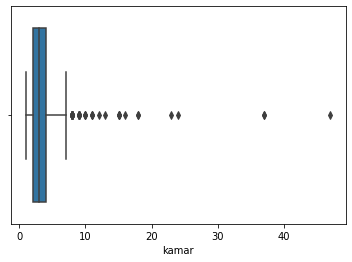

In [12]:
sns.boxplot(x = data_rumah['kamar'])

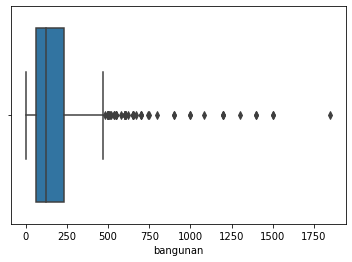

In [13]:
sns.boxplot(x = data_rumah['bangunan'])

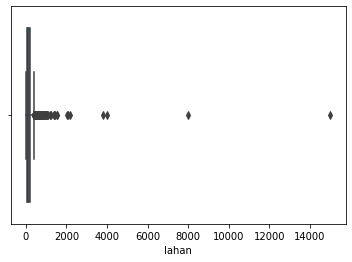

In [14]:
sns.boxplot(x = data_rumah['lahan'])

In [15]:
Q1 = data_rumah.quantile(0.25)
Q3 = data_rumah.quantile(0.75)
IQR = Q3 - Q1
data_rumah = data_rumah[~((data_rumah < (Q1 - 1.5 * IQR))|(data_rumah > (Q3 + 1.5 * IQR))).any(axis = 1)]
 
data_rumah.shape

<ipython-input-15-dce0881b31c0>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_rumah = data_rumah[~((data_rumah < (Q1 - 1.5 * IQR))|(data_rumah > (Q3 + 1.5 * IQR))).any(axis = 1)]


(1264, 5)

## Univariate Analysis

In [16]:
numerical_features = ['kamar', 'bangunan', 'lahan', 'harga']
categorical_features = ['alamat']

### Categorical Features

#### Fitur Alamat

                     jumlah sampel  persentase
Bandung                        209        16.5
Buahbatu, Bandung               65         5.1
Mekarwangi, Bandung             64         5.1
Padalarang, Bandung             54         4.3
Antapani, Bandung               41         3.2
...                            ...         ...
Cicendo, Bandung                 1         0.1
Panyirapan, Bandung              1         0.1
Tamansari, Bandung               1         0.1
Cihampelas, Bandung              1         0.1
Kebon Lega, Bandung              1         0.1

[128 rows x 2 columns]


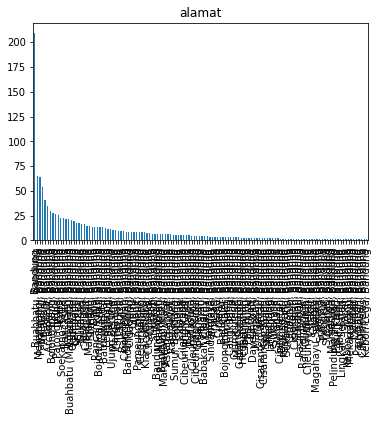

In [17]:
feature = categorical_features[0]
count = data_rumah[feature].value_counts()
percent = 100 * data_rumah[feature].value_counts(normalize = True)
df = pd.DataFrame({'jumlah sampel' : count, 'persentase' : percent.round(1)})
print(df)
count.plot(kind = 'bar', title = feature);

### Numerical Features

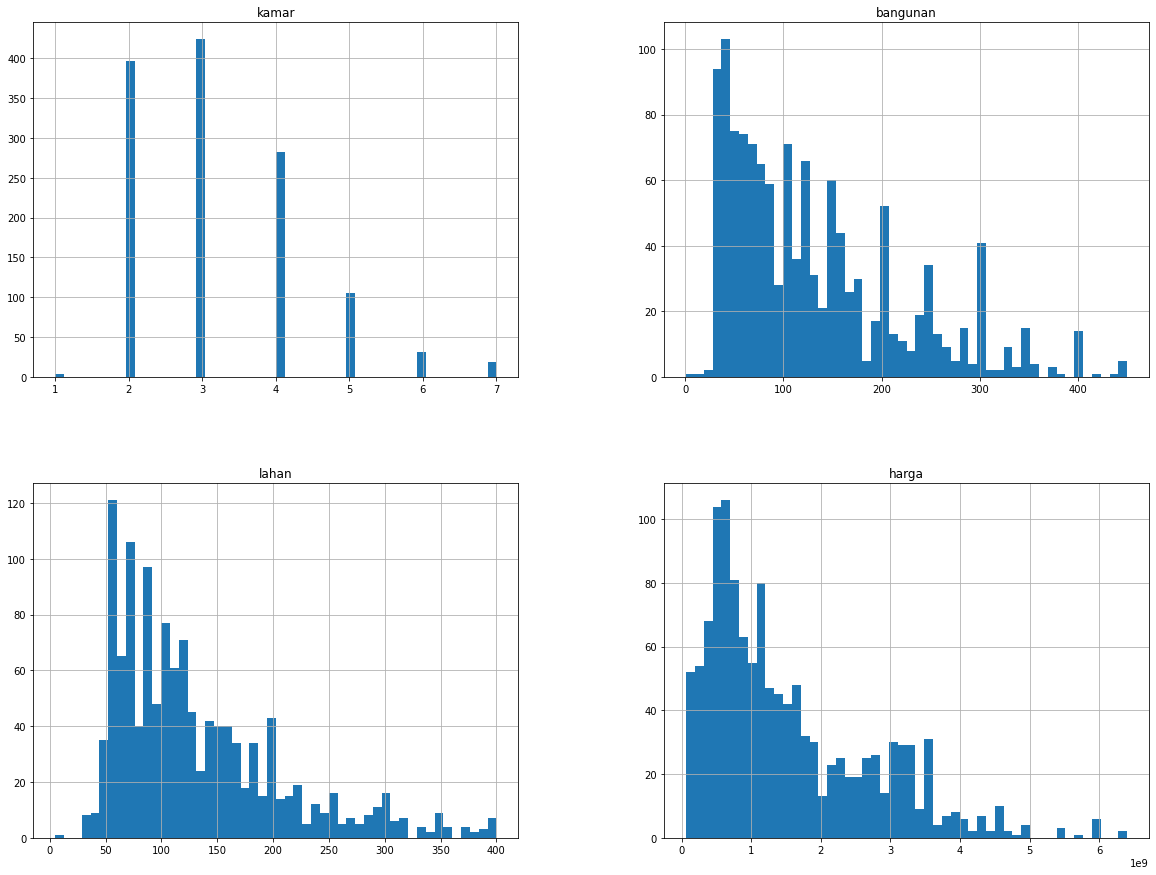

In [18]:
data_rumah.hist(bins = 50, figsize = (20, 15))
plt.show()

## Multivariate Analysis

### Categorical Features

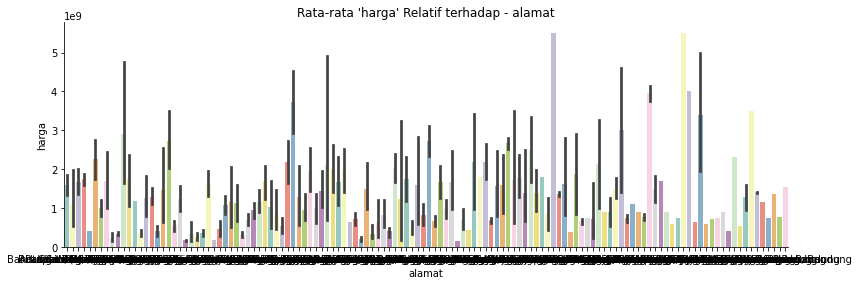

In [19]:
cat_features = data_rumah.select_dtypes(include = 'object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x = col, y = 'harga', kind = 'bar', dodge = False, height = 4, aspect = 3,  data = data_rumah, palette = 'Set3')
  plt.title('Rata-rata \'harga\' Relatif terhadap - {}'.format(col))

### Numerical Features

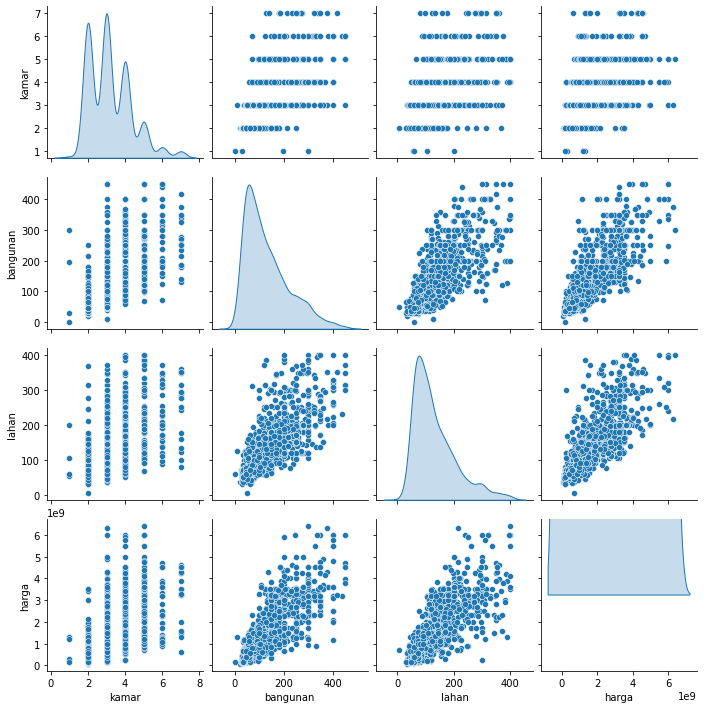

In [20]:
sns.pairplot(data_rumah, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

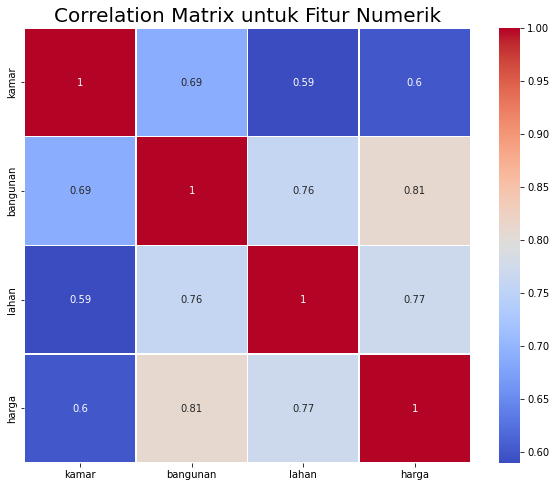

In [21]:
plt.figure(figsize = (10, 8))
correlation_matrix = data_rumah.corr().round(2)
 
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation Matrix untuk Fitur Numerik', size = 20)

# Data Preparation

## Encoding Fitur Kategori

In [22]:
data_rumah = pd.concat([data_rumah, pd.get_dummies(data_rumah['alamat'], prefix = 'alamat')], axis = 1)
data_rumah.drop(['alamat'], axis = 1, inplace = True)
data_rumah.head()

,kamar,bangunan,lahan,harga,"alamat_Andir, Bandung","alamat_Antapani, Bandung","alamat_Arcamanik, Bandung","alamat_Arjasari, Bandung","alamat_Astana Anyar, Bandung","alamat_Babakan Ciparay, Bandung",...,"alamat_Sukamiskin, Bandung","alamat_Sukapada, Bandung","alamat_Sukaraja, Bandung","alamat_Sukarasa, Bandung","alamat_Sukasari, Bandung","alamat_Sulaiman, Bandung","alamat_Sumur Bandung, Bandung","alamat_Tamansari, Bandung","alamat_Turangga, Bandung","alamat_Ujung Berung, Bandung"
0,3,75,84,590000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,70,71,700000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,36,72,386000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,60,60,499000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,90,114,397500000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train-Test-Split

In [23]:
X = data_rumah.drop(['harga'], axis = 1)
y = data_rumah['harga']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 123)

In [24]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1264
Total # of sample in train dataset: 1200
Total # of sample in test dataset: 64


## Standarisasi

In [25]:
numerical_features = ['kamar', 'lahan', 'bangunan']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,kamar,lahan,bangunan
1214,-0.181563,-0.415480,-0.632819
805,-1.056567,-0.798635,-0.665798
914,-1.056567,-0.428693,-0.797714
1319,0.693441,1.817385,1.400880
874,-0.181563,-0.917545,-0.907644


In [26]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

# Model Development

## Grid Search

In [27]:
def grid_search_model(X, y):
    algoritma = {
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [25, 50, 75, 100],
                'max_depth' : [8, 16, 32, 64],
                'random_state': [11, 33, 55, 77],
            }
        },
        'boosting': {
            'model': AdaBoostRegressor(),
            'params': {
                'learning_rate' : [0.1, 0.05, 0.01, 0.05, 0.001],
                'n_estimators': [25, 50, 75, 100],
                'random_state': [11, 33, 55, 77]
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.05, random_state = 123)
    for algo_name, config in algoritma.items():
        gs = GridSearchCV(config['model'], config['params'], cv = cv, return_train_score = False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

grid_search_model(X, y)

,model,best_score,best_params
0,knn,0.690720,{'n_neighbors': 15}
1,random_forest,0.771715,"{'max_depth': 32, 'n_estimators': 50, 'random_..."
2,boosting,0.714517,"{'learning_rate': 0.1, 'n_estimators': 25, 'ra..."


## Model with Best Parameter from Grid Search

In [28]:
accuracy = pd.DataFrame(index = ['accuracy'])

In [29]:
knn = KNeighborsRegressor(n_neighbors = 15)
knn.fit(X_train, y_train)
accuracy.loc['accuracy', 'knn'] = knn.score(X_test, y_test)
knn.score(X_test, y_test)

0.6807066242406339

In [30]:
rf = RandomForestRegressor(n_estimators = 50, max_depth = 32, random_state = 33)
rf.fit(X_train, y_train)
accuracy.loc['accuracy', 'rf'] = rf.score(X_test, y_test)
rf.score(X_test, y_test)

0.6838122416306687

In [31]:
boosting = AdaBoostRegressor(n_estimators = 25, learning_rate = 0.1, random_state = 55)                             
boosting.fit(X_train, y_train)
accuracy.loc['accuracy', 'boosting'] = boosting.score(X_test, y_test)
boosting.score(X_test, y_test)

0.6942395162086608

# Evaluasi Model

In [32]:
accuracy

,knn,rf,boosting
accuracy,0.680707,0.683812,0.69424


In [33]:
mse = pd.DataFrame(columns = ['train', 'test'], index = ['KNN', 'RF', 'Boosting'])

model_dict = {
    'KNN': knn, 'RF': rf, 'Boosting': boosting,
    }

for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true = y_train, y_pred = model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true = y_test, y_pred = model.predict(X_test))/1e3

mse

,train,test
KNN,321122382813839.0,264431404216169.65625
RF,49813468399720.5625,261859403574277.4375
Boosting,368533307684197.625,253223775439968.625


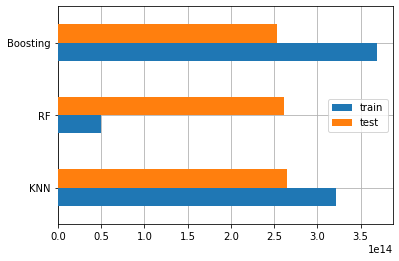

In [34]:
fig, ax = plt.subplots()
mse.sort_values(by = 'test', ascending = False).plot(kind = 'barh', ax = ax, zorder = 3)
ax.grid(zorder = 0)

In [35]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {
    'y_true' : y_test[:1]
    }
for name, model in model_dict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
606,3250000000,1.868000e+09,1.624470e+09,2.080181e+09
